# SVM

In [77]:
# Recursive Feature Elimination
import numpy as np
import pandas as pd
#from InformationGain import ig_list
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# load cancer datasets
df = pd.read_csv("svmdata.csv", header = 0)
#df = pd.read_csv("testForSVM.csv", header = 0)
original_headers = list(df.columns.values)

# extract numeric columns
numericColumns = df._get_numeric_data()

target=numericColumns["DR"]
x = df.drop('DR', axis=1).values  #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x) #scale x data between o and 1
numericColumns = pd.DataFrame(x_scaled) # dataframs with x values scaled and columns with numeric index
#print(numericColumns)

#print(numericColumns)


#Apply SVM:

X_train, X_test, y_train, y_test = train_test_split(numericColumns, target, test_size=0.3, random_state=0)
clf = svm.SVC(kernel='rbf', C=1E10).fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train, cv=10)

y_pred = clf.predict(X_test) 
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  


#Apply logistic regression:

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

# for k in range (1):
#     X_train, X_test, y_train, y_test = train_test_split(numericColumns, target, test_size=0.3, random_state=0)
#     clf = svm.SVC(kernel='rbf', C=1).fit(X_train, y_train)
#     scores = cross_val_score(clf, X_train, y_train, cv=10)
#     print(clf.predict(X_test[1:4]))
#     print(y_test[1:4])
#     print(scores)


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


[[199  45]
 [201  90]]
             precision    recall  f1-score   support

          0       0.50      0.82      0.62       244
          1       0.67      0.31      0.42       291

avg / total       0.59      0.54      0.51       535

[[  0 244]
 [  2 289]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       244
          1       0.54      0.99      0.70       291

avg / total       0.29      0.54      0.38       535



In [73]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=300)  
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test)  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[103 141]
 [ 80 211]]
             precision    recall  f1-score   support

          0       0.56      0.42      0.48       244
          1       0.60      0.73      0.66       291

avg / total       0.58      0.59      0.58       535



AttributeError: coef_ is only available when using a linear kernel

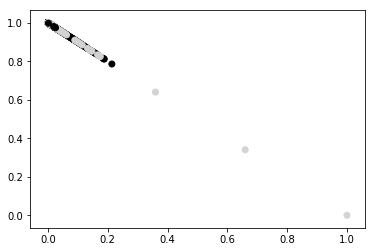

In [44]:
import matplotlib.pyplot as plt
# Plot data points and color using their class
color = ['black' if c == 0 else 'lightgrey' for c in target]
plt.scatter(x_scaled[:,0], x_scaled[:,1], c=color)

# Create the hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-1, 2)
yy = a * xx - (clf.intercept_[0]) / w[1]

# Plot the hyperplane
plt.plot(xx, yy)
# plt.axis("off"), plt.show();